### Data Source: 

#### Query
Web of Science Query = (

  TS=(biodivers* OR "biological diversity" OR "bio-divers*" OR "bio divers*")

  OR SU="Biodiversity & Conservation"

)

AND DT=(Article OR Review)

AND PY=(1980-2025)

#### Query Notes
- Period: Starting 1980s since this is period biodiversity as field emerged

- SU = Research Area in WOS: https://webofscience.help.clarivate.com/Content/current-contents/ccc-search-field-tags.htm

In WOS research areas (total 5), Life Science & Biomedicine (1/5) contains only this tag for biodiversity: "Biodiversity & Conservation"

- TS = Topic Search = [Title, Abstract, Author Keywords, Keywords Plus]

Topic search query is kept general here and adopted from 2016 bibliometric assessment here: (See page 2)
https://www.scirp.org/pdf/OJE_2014052617163441.pdf#page=12.10




#### Notes 

- WOS Results returned = 359,435 records

- Time of most recent query: 10 Jul 2025 311pm - 11pm 

- Internal note: Version 2 of query


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Dataframes

In [ ]:
df = pd.read_excel("dataset/curated_data/data.xlsx")
df_sample = df.sample(n=1000, random_state=42)
df_sample.to_csv("dataset/curated_data/sample_data.csv", index=False)
core_cols = [
    "Publication Type", "Article Title", "Language", "Document Type",
    "Author Keywords", "Keywords Plus", "Abstract", 
    "Publisher", "Publisher City", "Publication Date", "Publication Year", 
    "Web of Science Index", "WoS Categories", "Research Areas", 
    "Highly Cited Status", "Hot Paper Status", "UT (Unique WOS ID)"
]


In [67]:
df_core = df[core_cols].copy()

### 2. Overall Summary

In [68]:
cols = df.columns

# Count summary
    # Row counts
count_summary = {
    "row_count": len(df_core),
    "web_of_science_record_count": df_core["UT (Unique WOS ID)"].count(),
    "web_of_science_record_distinct_count": df_core["UT (Unique WOS ID)"].nunique(),
    "duplicated_row_count": df_core.duplicated().sum()
}
    # Nulls
null_counts = df_core.isnull().sum()
null_cols = null_counts[null_counts > 0].sort_values(ascending=False)

#### - Shape & Core Cols

- Core cols are subset of cols useful for analysis 
- Overall Counts:
    - Source Data Count = 359,435
    - Duplicates = 502
    - Count after dropping duplicates = 358,933

In [70]:
print(f"Dataset shape: {df_core.shape}")
print(f"{len(core_cols)} Core Cols out of {len(cols)} total cols in the dataset:")
print(core_cols)
print(f" Count Summary : {count_summary}")



Dataset shape: (359435, 17)
17 Core Cols out of 72 total cols in the dataset:
['Publication Type', 'Article Title', 'Language', 'Document Type', 'Author Keywords', 'Keywords Plus', 'Abstract', 'Publisher', 'Publisher City', 'Publication Date', 'Publication Year', 'Web of Science Index', 'WoS Categories', 'Research Areas', 'Highly Cited Status', 'Hot Paper Status', 'UT (Unique WOS ID)']
 Count Summary : {'row_count': 359435, 'web_of_science_record_count': np.int64(359435), 'web_of_science_record_distinct_count': 358933, 'duplicated_row_count': np.int64(502)}


In [71]:
df_core = df_core.drop_duplicates()
print(f"Dropped {count_summary['row_count'] - len(df_core)} duplicated rows. Remaining rows: {len(df_core)}")

Dropped 502 duplicated rows. Remaining rows: 358933


#### - Nulls
- ~16k records contains no abstract. There are dropped from df_core
- Original Row count = 359,435; New Row count: 342,484

In [72]:
print(f" {len(null_cols)} Columns with null values:   {null_cols}" )

 8 Columns with null values:   Highly Cited Status    357249
Hot Paper Status       357249
Author Keywords         67226
Publication Date        50285
Keywords Plus           44687
Abstract                16481
WoS Categories              8
Research Areas              8
dtype: int64


In [73]:
before_count = len(df_core)
df_core = df_core.dropna(subset=["Abstract"])
after_count = len(df_core)
print(f"Dropped {before_count - after_count} rows. Remaining rows: {after_count}")

Dropped 16449 rows. Remaining rows: 342484


#### - Distinct Value Counts
- Nulls: Expected to have nulls in "Highly Cited"  and "Hot Paper" since it's "Y or N" only when applicable. Else null.
- Keywords are not always given (Keyword plus , author keyword) - ~15-20% rows
- Basic details like title, abstract, categories, researach area have no or 1,2 nulls only

In [76]:
distinct_counts = df_core.nunique(dropna=True).sort_values(ascending=False)
null_counts = df_core.isnull().sum()
summary = pd.DataFrame({'distinct': distinct_counts, 'nulls': null_counts[distinct_counts.index]})
print(summary)

                      distinct   nulls
UT (Unique WOS ID)      342484       0
Abstract                342344       0
Article Title           342241       0
Keywords Plus           297609   34066
Author Keywords         290384   51581
Publisher                 3112       0
WoS Categories            2118       2
Research Areas            1549       2
Publisher City            1411       0
Publication Date          1164   40289
Publication Year            46       0
Web of Science Index        45       0
Language                    42       0
Document Type               14       0
Publication Type             3       0
Highly Cited Status          2  340300
Hot Paper Status             2  340300


#### - Language
- ~97.7% of publications are in "English"

In [78]:
lang_counts = df_core['Language'].value_counts(dropna=False)
lang_percent = df_core['Language'].value_counts(normalize=True, dropna=False) * 100
lang_summary = pd.DataFrame({'count': lang_counts, 'percent': lang_percent.round(2)})
print(lang_summary)

                    count  percent
Language                          
English            334702    97.73
Spanish              4002     1.17
Portuguese           1293     0.38
French                961     0.28
Russian               534     0.16
German                348     0.10
Polish                134     0.04
Turkish                86     0.03
Chinese                77     0.02
Italian                69     0.02
Croatian               55     0.02
Czech                  46     0.01
Ukrainian              34     0.01
Japanese               22     0.01
Korean                 15     0.00
Indonesian             13     0.00
Malay                  11     0.00
Slovak                 10     0.00
Hungarian               9     0.00
Dutch                   9     0.00
Lithuanian              7     0.00
Serbian                 6     0.00
Unspecified             5     0.00
Afrikaans               4     0.00
English; Estonian       4     0.00
Arabic                  4     0.00
Slovenian           

### S2

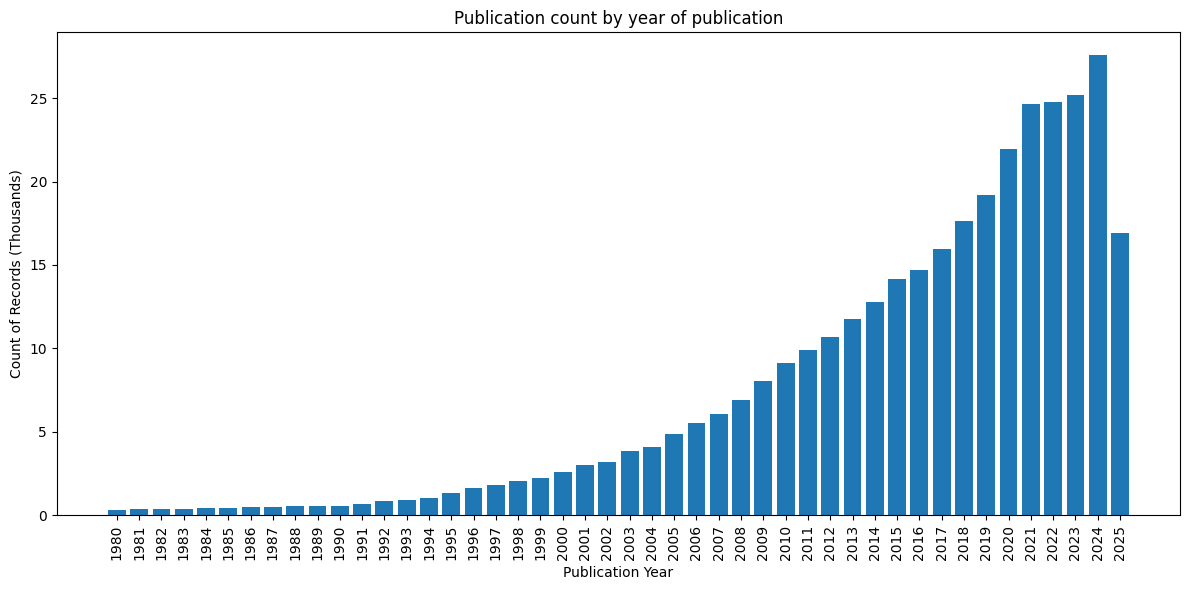

In [86]:
year_counts = df_core['Publication Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(year_counts.index, year_counts.values / 1000)
plt.xlabel('Publication Year')
plt.ylabel('Count of Records (Thousands)')
plt.title('Publication count by year of publication')
plt.xticks(year_counts.index, rotation=90)
plt.tight_layout()
plt.show()

In [94]:
df_core.head()

,Publication Type,Article Title,Language,Document Type,Author Keywords,Keywords Plus,Abstract,Publisher,Publisher City,Publication Date,Publication Year,Web of Science Index,WoS Categories,Research Areas,Highly Cited Status,Hot Paper Status,UT (Unique WOS ID)
4,J,Population effects of white-tailed deer dispersal,English,Article,Chesapeake farms; dispersal; emigration; immig...,NORTHEASTERN MINNESOTA,Dispersal is difficult to measure and is often...,WILDLIFE SOC,BETHESDA,FAL,1999,Science Citation Index Expanded (SCI-EXPANDED),Biodiversity Conservation,Biodiversity & Conservation,NaN,NaN,WOS:000084173500041
5,J,Avian cholera mortality in lesser snow geese n...,English,Article,avian cholera; Banks Island; Chen caerulescens...,GOOSE,Avian cholera is one of the most important dis...,WILDLIFE SOC,BETHESDA,FAL,1999,Science Citation Index Expanded (SCI-EXPANDED),Biodiversity Conservation,Biodiversity & Conservation,NaN,NaN,WOS:000084173500033
7,J,Reproduction of wood ducks in large and small ...,English,Article,Aix sponsa; cost-benefit; ducklings; dump nest...,BROOD PARASITISM; PLACEMENT,wood dude (Aix sponsa) production may decrease...,WILDLIFE SOC,BETHESDA,SPR,1998,Science Citation Index Expanded (SCI-EXPANDED),Biodiversity Conservation,Biodiversity & Conservation,NaN,NaN,WOS:000075141500025
8,J,Accuracy of pregnancy detection by serum prote...,English,Article,elk; pregnancy; PSPB,DEER,Blood sera from 225 Rocky Mountain elk (Cervus...,WILDLIFE SOC,BETHESDA,FAL,1997,Science Citation Index Expanded (SCI-EXPANDED),Biodiversity Conservation,Biodiversity & Conservation,NaN,NaN,WOS:A1997YH63300023
12,J,Effects of logging roads on depredation of art...,English,Article,artificial nest; bird; clearcutting; forest; l...,SPRUCE GROUSE; HABITAT; PREDATION; DYNAMICS; S...,We examined depredation of artificial ground n...,WILDLIFE SOC,BETHESDA,SPR,1997,Science Citation Index Expanded (SCI-EXPANDED),Biodiversity Conservation,Biodiversity & Conservation,NaN,NaN,WOS:A1997XA82200028
